Let's first make a grayscale image that gets lighter (higher brightness) as we move from left to right (increasing x value)

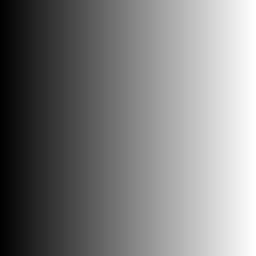

In [ ]:
'''
Tutorial based on https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
'''
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from google.colab import drive

# Load the Drive helper and mount
drive.mount('/content/drive')

xRez=256; yRez=256;
img=np.zeros((yRez,xRez),dtype='uint8')
for x in range(xRez):
  img[:,x]=x
cv2_imshow(img)

Now lets look at some threshold techniques applied to our image im.

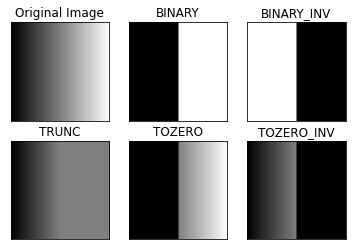

In [ ]:

ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In the previous section, we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


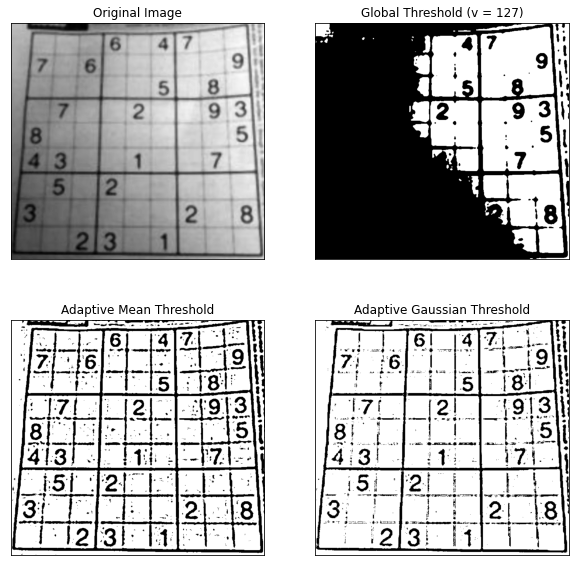

In [ ]:
imFile = r'/content/drive/MyDrive/SCIP_DATA/Images/sudoku.jpg'  
imgColor = cv2.imread(imFile)   # Read color image 
img = cv2.cvtColor(imgColor, cv2.COLOR_BGR2GRAY)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Threshold (v = 127)','Adaptive Mean Threshold', 'Adaptive Gaussian Threshold']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    plt.gcf().set_size_inches(10,10)
plt.show()

Another way to handle uneven lighting is to use a very blurred version of an image to capture the gradient of the lighting, that is the variation in the lighting.  Then we can subtract the variation of the lighting from the image, producing an image with more uniform lighting. In the below example, which is a microscopic image of fly eggs ("Original Image"). Notice that the image is brighter in the center, and the brightness falls off radially.  If we apply a fixed global threshold, the center is detected ("Original Thresh"). If we blur the image, we get an overall average of the brightness across the image ("Blur"). We then subtract the blurred image from the original image, to get a differential image ("Diff"). Notice the uniform lighting in the "Diff" image. Now we can apply a global threshould to the "Diff" image to get all the eggs ("Diff Thresh") without being obscured by the bright light in the center.

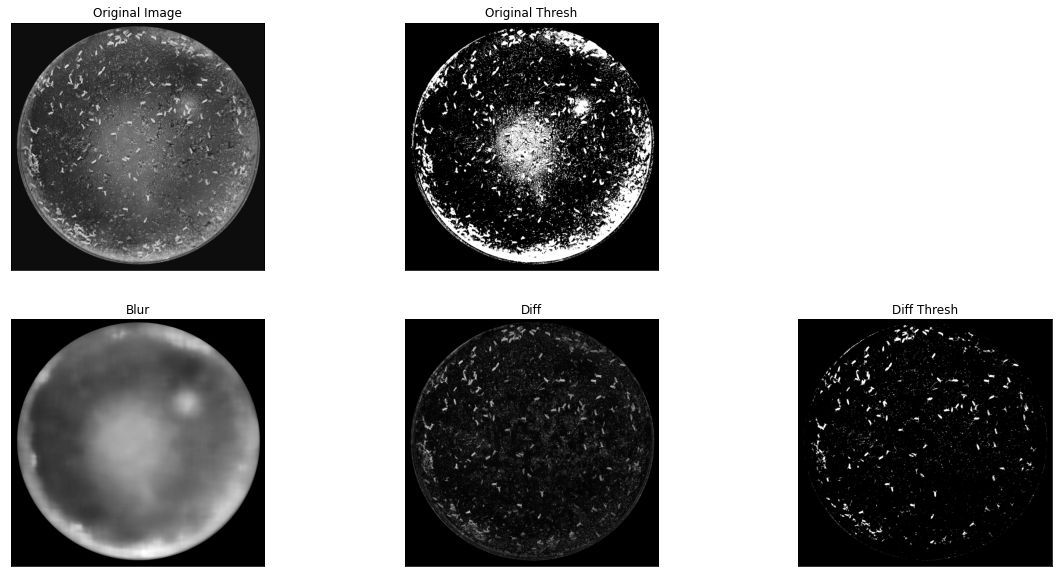

In [ ]:
imFile = r'/content/drive/MyDrive/SCIP_DATA/Images/FlyEggs.jpg'  
imgColor = cv2.imread(imFile)   # Read color image 
img = cv2.cvtColor(imgColor, cv2.COLOR_BGR2GRAY)

BLUR=131 
# global thresholding
r1,th1 = cv.threshold(img,80,255,cv.THRESH_BINARY)

blurIM = cv2.medianBlur(img,BLUR)
#blurIM = cv2.medianBlur(blurIM,BLUR)

diffIM = cv2.absdiff(img, blurIM) # Calculate absolute difference of current frame and the median frame
r2,th2 = cv2.threshold(diffIM, 60, 255, cv2.THRESH_BINARY) # Threshold to binarize

titles = ['Original Image', 'Original Thresh','Blur', 'Diff', 'Diff Thresh']
images = [img, th1, blurIM,diffIM,th2]
for i in range(5):
    j=i
    if i>1: # first row has two image, second row has 3 images
      j=i+1 
    plt.subplot(2,3,j+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    plt.gcf().set_size_inches(20,10)
plt.show()